# Clustering - Cereals Dataset

In [1]:
import pandas as pd
import numpy as np

##### Dataset Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

### Reading data

In [22]:
cereals=pd.read_csv("cereals.csv")


In [5]:
cereals.head(2)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679


In [7]:
[cereals.dtypes]

[name         object
 calories      int64
 protein       int64
 fat           int64
 sodium        int64
 fiber       float64
 carbo       float64
 sugars      float64
 potass      float64
 vitamins      int64
 shelf         int64
 weight      float64
 cups        float64
 rating      float64
 dtype: object]

In [10]:
cereals.shape

(77, 14)

In [9]:
cereals.describe(include=np.number)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [11]:
cereals.shelf.value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

In [13]:
cereals.rating.value_counts().head(3)

34.139765    1
21.871292    1
18.042851    1
Name: rating, dtype: int64

### Aggregating "name", "shelf" and "rating" to make labels

In [23]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

In [15]:
cereals.shape

(77, 12)

# Data Exploration

In [17]:
cereals.label.value_counts().head(2)

Froot_Loops (2 - 32.21)     1
Puffed_Wheat (3 - 63.01)    1
Name: label, dtype: int64

In [24]:
label=cereals["label"]

### Check summary statistics

In [19]:
cereals.describe(include=np.number)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


### Decouple label from the features

In [25]:
cereals.drop("label", axis=1, inplace=True)

### Check missing values

In [27]:
cereals.isna().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

In [34]:
null_columns=cereals.columns[cereals.isnull().any()]

In [37]:
null_columns

Index(['carbo', 'sugars', 'potass'], dtype='object')

In [35]:
cereals[cereals.isnull().any(axis=1)][null_columns]

,carbo,sugars,potass
4,14.0,8.0,NaN
20,21.0,0.0,NaN
57,NaN,NaN,110.0


### Imputation

In [38]:
from sklearn.preprocessing import Imputer

In [41]:
mean_imputer=Imputer(strategy='mean')

In [44]:
type(mean_imputer.fit_transform(cereals))

numpy.ndarray

In [42]:
imputed_cereals=pd.DataFrame(mean_imputer.fit_transform(cereals), columns=cereals.columns)

In [43]:
imputed_cereals.iloc[[4,20,57], :]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
4,110.0,2.0,2.0,200.0,1.0,14.000000,8.000000,98.666667,25.0,1.0,0.75
20,100.0,3.0,0.0,80.0,1.0,21.000000,0.000000,98.666667,0.0,1.0,1.00
57,100.0,5.0,2.0,0.0,2.7,14.802632,7.026316,110.000000,0.0,1.0,0.67


### Checking for NAs again

In [46]:
cereals.isna().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
std_scaler=StandardScaler()

In [52]:
std_scaler.fit(imputed_cereals)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaled_data=pd.DataFrame(std_scaler.fit_transform(imputed_cereals), columns=imputed_cereals.columns)

In [51]:
scaled_data.head(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,-0.198067,-2.123870
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,-0.198067,0.774053


#### Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.



## Agglomerative Clustering


In [54]:
import matplotlib.pyplot as plt
%matplotlib notebook
#Type the code here

<IPython.core.display.Javascript object>


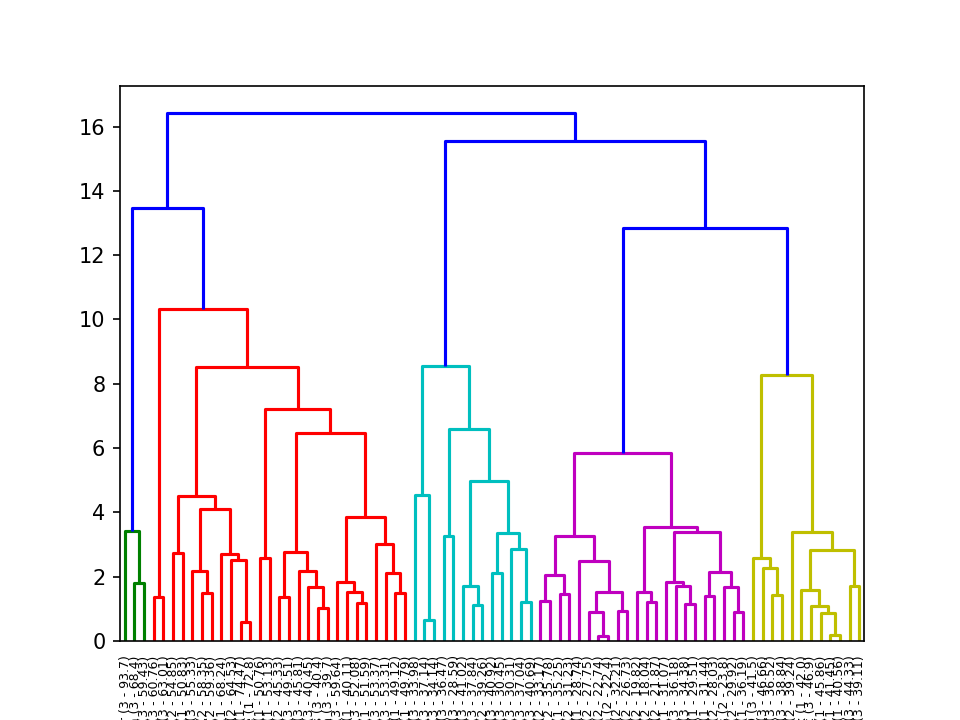

In [61]:
# $ find clusters 

from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix=linkage(scaled_data, method="ward", metric="euclidean")
fig, axs=plt.subplots()
dendrogram(linkage_matrix, labels=list(label))
# plt.tight_layout()
plt.show()


In [67]:
#Type the code here
# modelling 
from sklearn.cluster import AgglomerativeClustering
agg_clust=AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
agg_clusters=agg_clust.fit_predict(scaled_data)

## Label - Cluster
agg_result = pd.DataFrame({"label":label,"agg_cluster":agg_clusters})
agg_result.head()

,label,agg_cluster
0,100%_Bran (3 - 68.4),3
1,100%_Natural_Bran (3 - 33.98),0
2,All-Bran (3 - 59.43),3
3,All-Bran_with_Extra_Fiber (3 - 93.7),3
4,Almond_Delight (3 - 34.38),4


In [68]:
agg_result["agg_cluster"].value_counts()

2    25
4    22
0    13
1    12
3     3
5     2
Name: agg_cluster, dtype: int64

In [ ]:
agg_clusters

## K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : Maximum number of iterations of the k-means algorithm for a single run.


In [80]:
#Type the code here

from sklearn.cluster import KMeans
km=KMeans(n_clusters=6,n_init=3, max_iter=300, algorithm="elkan")
kmeans_clusters=km.fit_predict(scaled_data)

kmeans_results = pd.DataFrame({"label":label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),1
1,100%_Natural_Bran (3 - 33.98),2
2,All-Bran (3 - 59.43),1
3,All-Bran_with_Extra_Fiber (3 - 93.7),1
4,Almond_Delight (3 - 34.38),0


In [84]:

from sklearn.cluster import KMeans
km=KMeans(n_clusters=6,n_init=3, max_iter=300, algorithm="auto", tol=0.0000001)
kmeans_clusters=km.fit_predict(scaled_data)

kmeans_results = pd.DataFrame({"label":label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),0
1,100%_Natural_Bran (3 - 33.98),2
2,All-Bran (3 - 59.43),0
3,All-Bran_with_Extra_Fiber (3 - 93.7),0
4,Almond_Delight (3 - 34.38),3


In [81]:
km.cluster_centers_

array([[ 0.20798344, -0.91940708,  0.03247027,  0.12396629, -0.65926792,
        -0.59711721,  0.99316184, -0.70922536, -0.14627013, -0.19806746,
         0.20980312],
       [-0.79838805,  0.81194392, -0.44159568,  0.46701767,  2.34912186,
        -1.17132462,  0.15920009,  2.31660843, -0.14627013,  0.74796529,
        -1.12906098],
       [ 0.81538455,  0.78567514,  1.38712997, -0.35630563,  0.23708781,
        -0.22883806,  0.27200308,  0.50705992, -0.2964408 ,  0.54219521,
        -0.68788461],
       [-0.14286529,  0.14749846, -0.48361603,  0.81612289, -0.23807076,
         0.98168077, -0.86365156, -0.4067842 , -0.14627013, -0.19806746,
         0.48146173],
       [ 0.50542213,  0.11144328, -0.17966883,  0.58422689, -0.1345594 ,
         0.87235981, -0.16036002, -0.04104771,  3.23256986,  0.69381527,
         0.59383365],
       [-1.18215105, -0.04179123, -0.91306402, -1.80312481, -0.06417167,
         0.284569  , -1.13997707, -0.10575821, -0.82203813, -0.98069456,
         0.185

### Inspecting cluster centroids to understand average statistics of each cluster

In [76]:
# inverse_transform is used to Scale back the data to the original representation
#Type the code here

cluster_centroids=pd.DataFrame(std_scaler.inverse_transform(km.cluster_centers_), columns=cereals.columns)
cluster_centroids
cluster_centroids.to_csv("centroids")

In [78]:
#Type the code here
wss={}
for i in range(1, 21):
    km=KMeans(n_clusters=i)
    km.fit_predict(scaled_data)
    wss[i]=km.inertia_

In [79]:
wss

{1: 846.9999999999999,
 2: 686.1907115207284,
 3: 584.7237118058638,
 4: 495.571244915119,
 5: 435.96354606844966,
 6: 356.28312511182185,
 7: 314.4449757098777,
 8: 277.1410125890845,
 9: 251.45691244885143,
 10: 227.32325889825162,
 11: 213.59083900129895,
 12: 187.69582106244172,
 13: 178.5118947429116,
 14: 159.40002088889594,
 15: 143.56384960022334,
 16: 134.39868104789144,
 17: 134.05842538451256,
 18: 125.25027060648193,
 19: 117.88262050761793,
 20: 111.78476914046591}

<IPython.core.display.Javascript object>


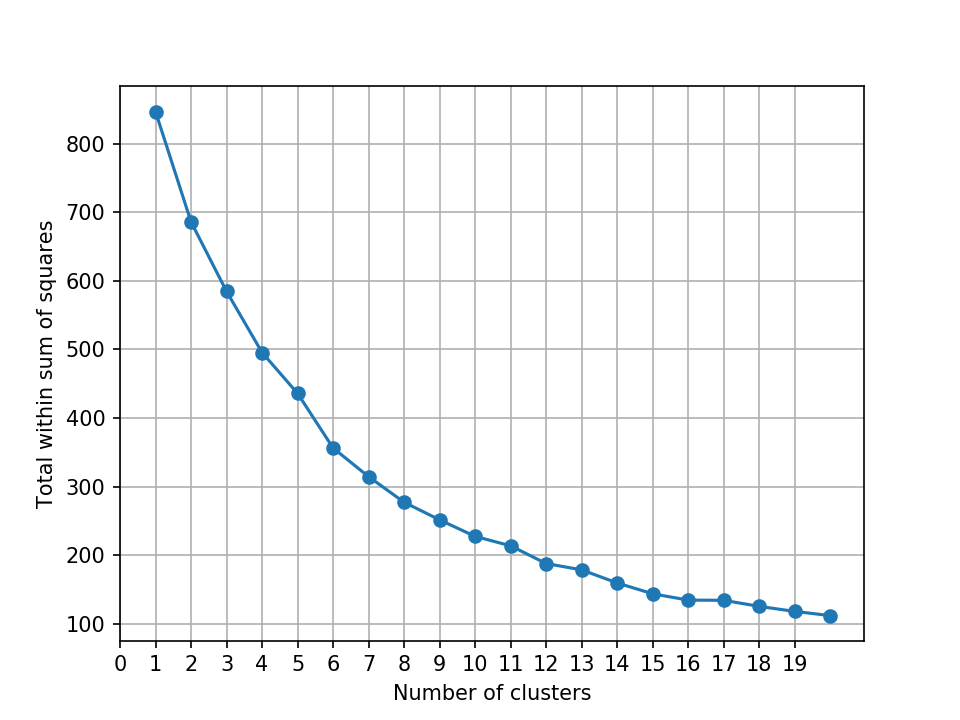

In [83]:
import matplotlib.pyplot as plt
plt.figure()
# %matplotlib notebook

plt.plot(list(wss.keys()),list(wss.values()),marker='o')

# plt.plot(list(wss.keys()),list(wss.values()))
plt.grid()
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel('Total within sum of squares')
plt.show()


### How to select best K value for K-Means -> Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*

Automatically created module for IPython interactive environment


C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<IPython.core.display.Javascript object>


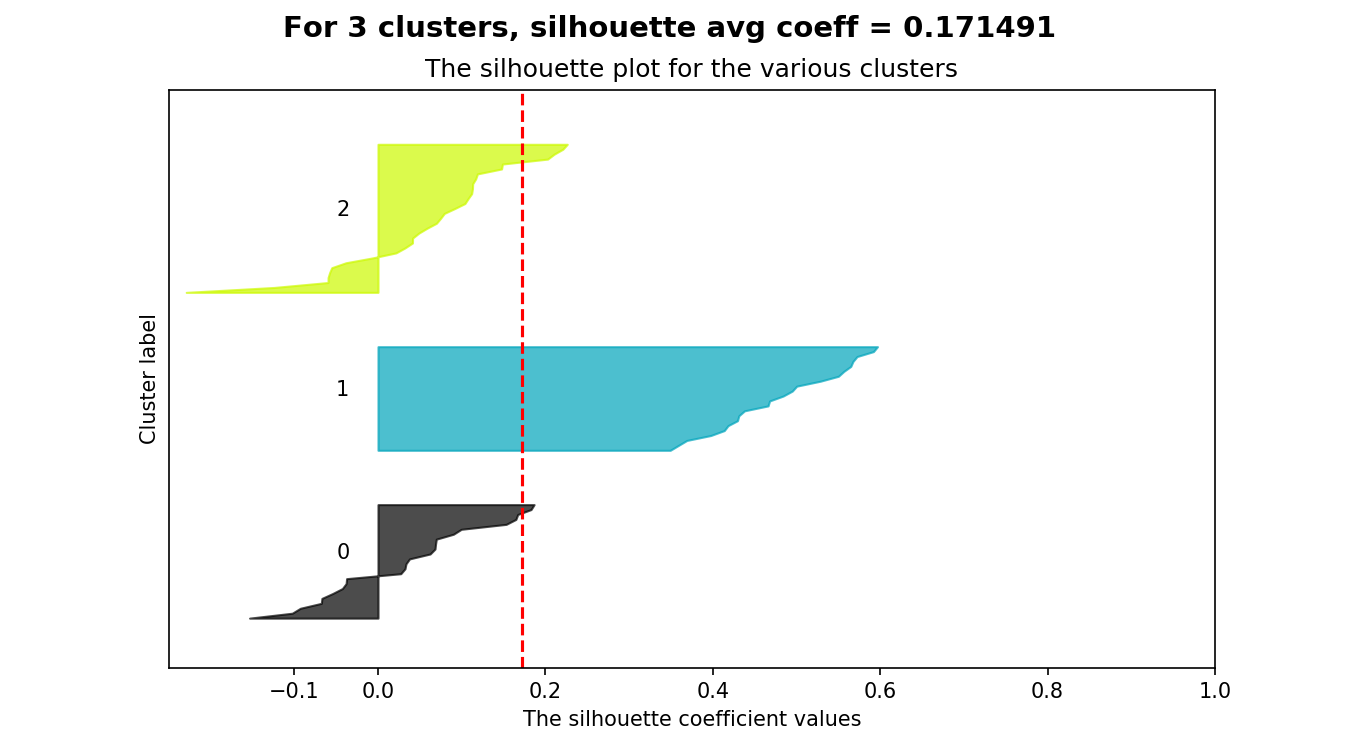

<IPython.core.display.Javascript object>


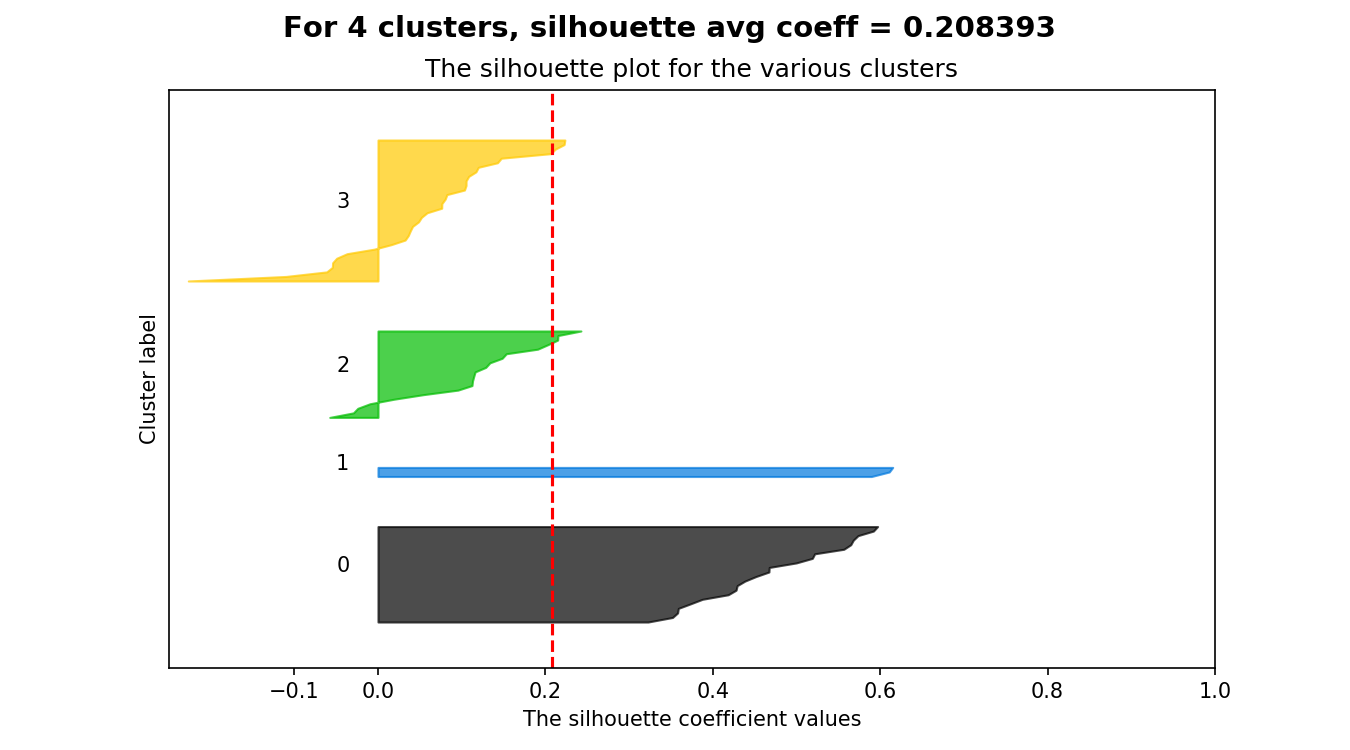

<IPython.core.display.Javascript object>


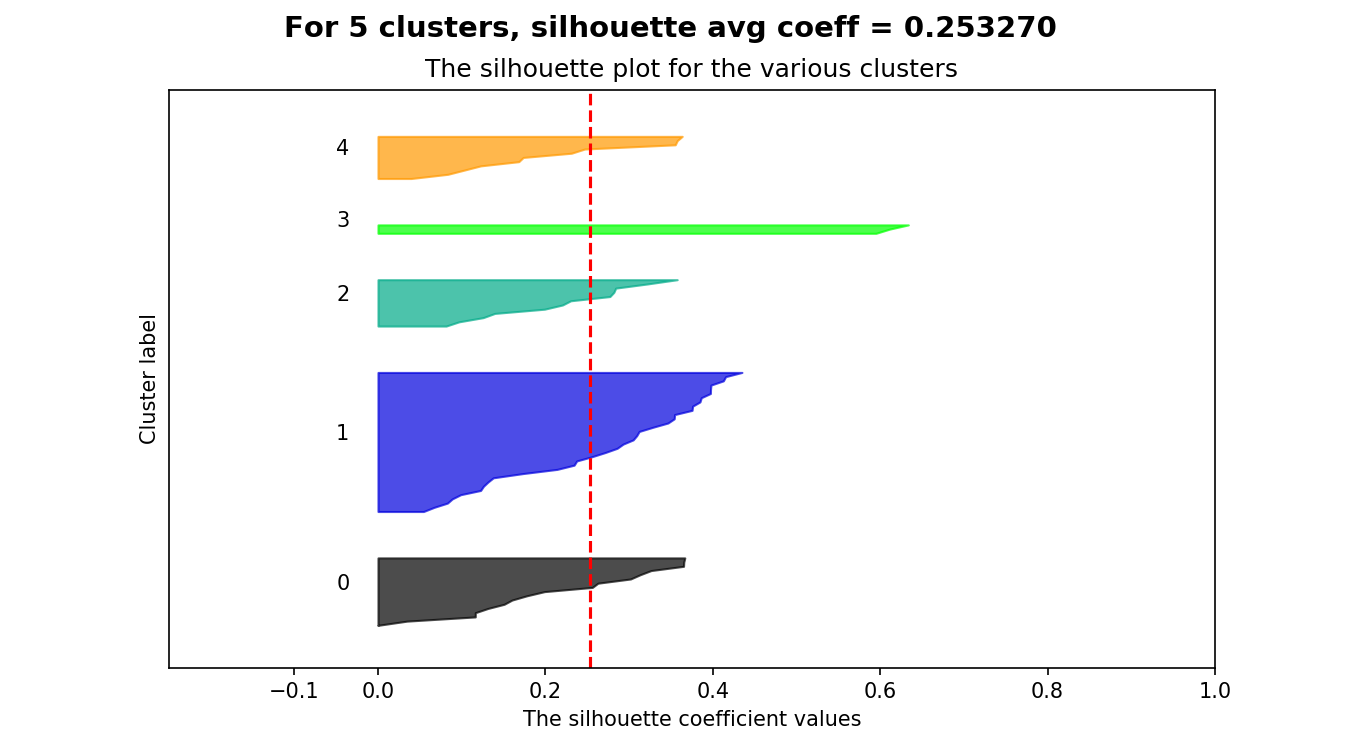

<IPython.core.display.Javascript object>


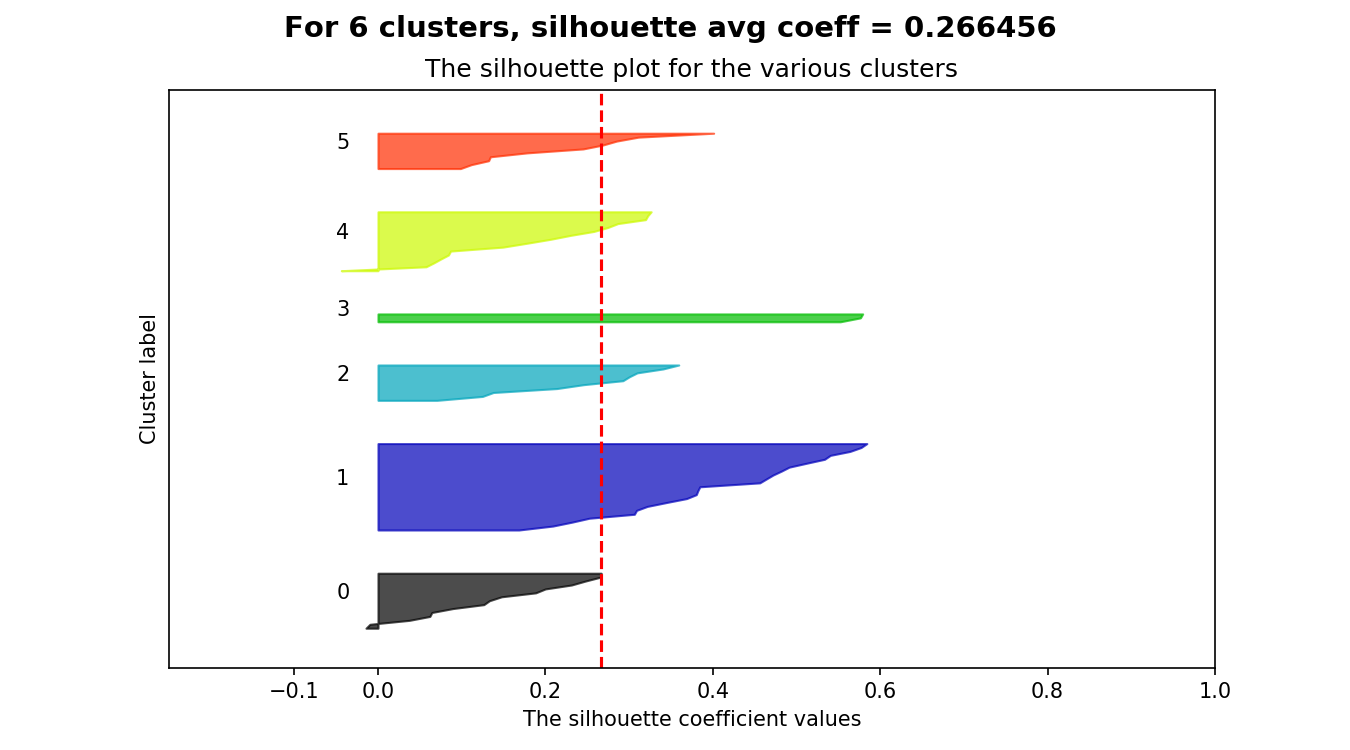

<IPython.core.display.Javascript object>


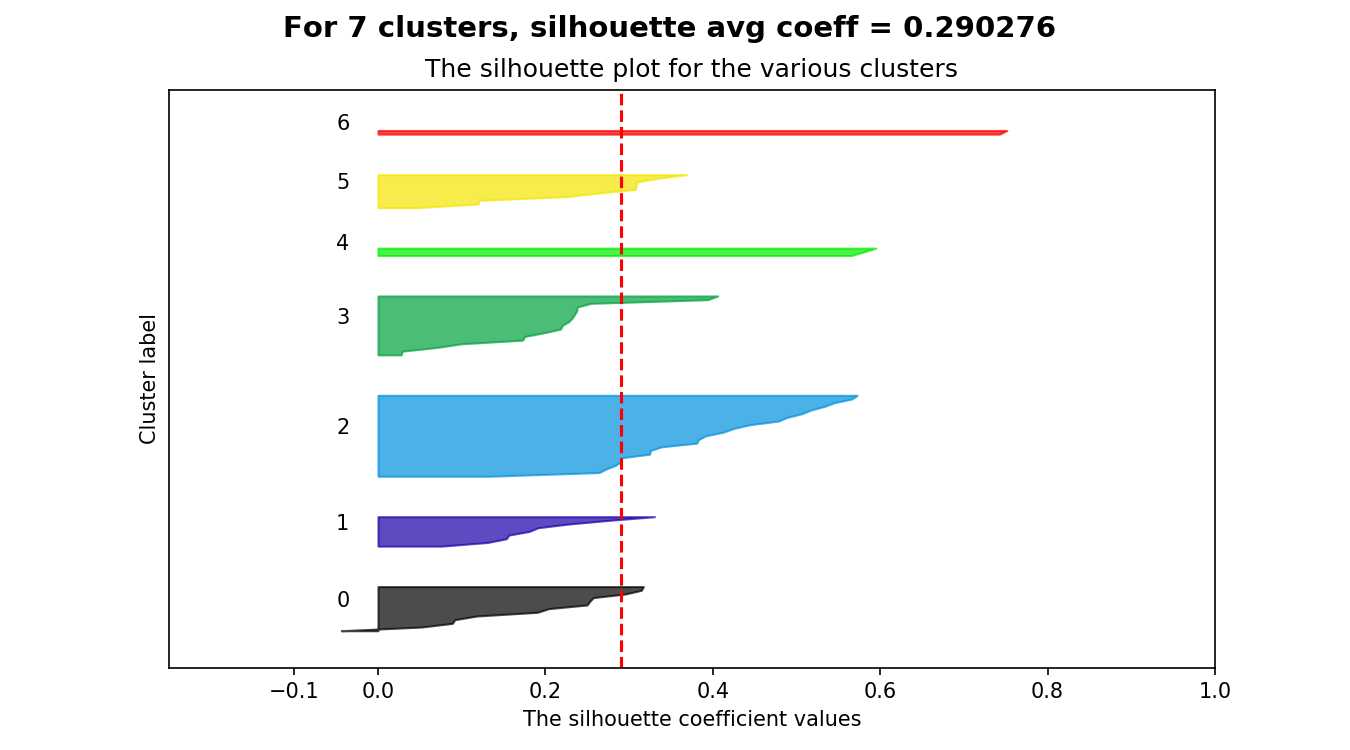

<IPython.core.display.Javascript object>


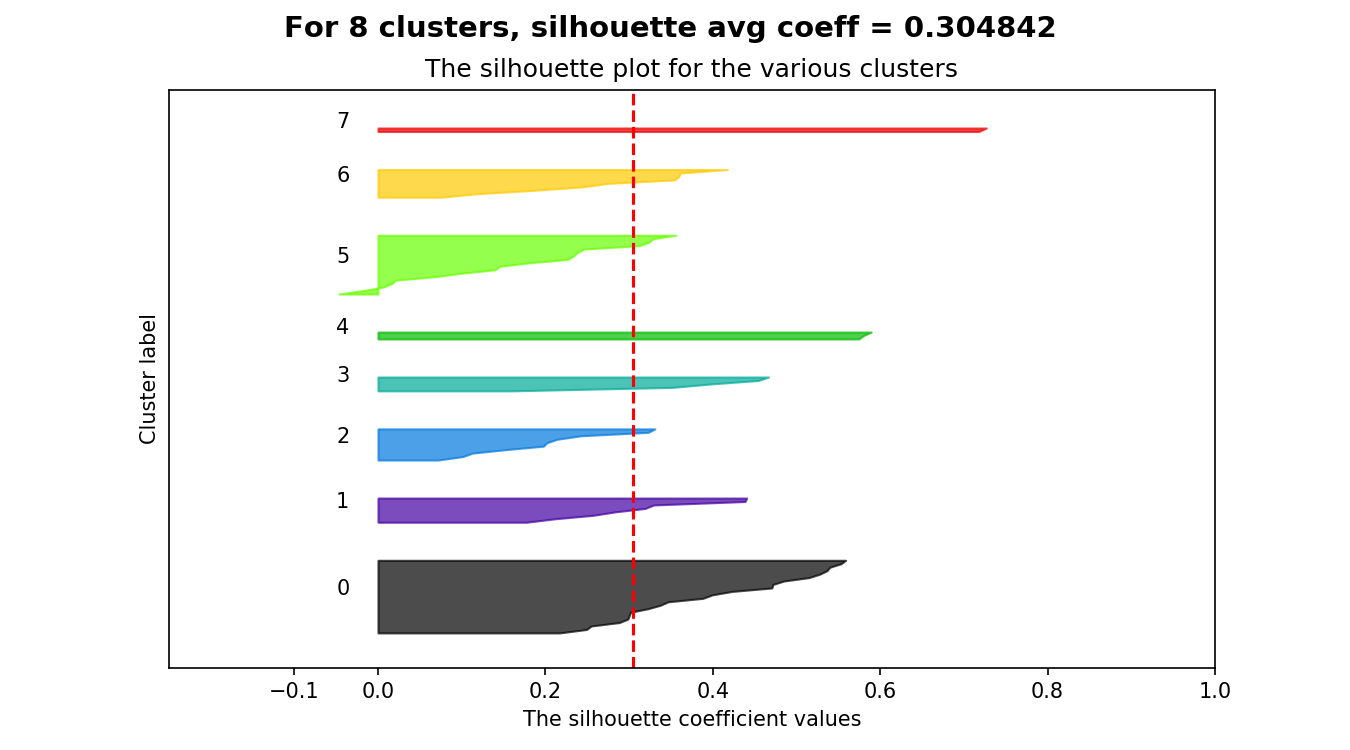

<IPython.core.display.Javascript object>


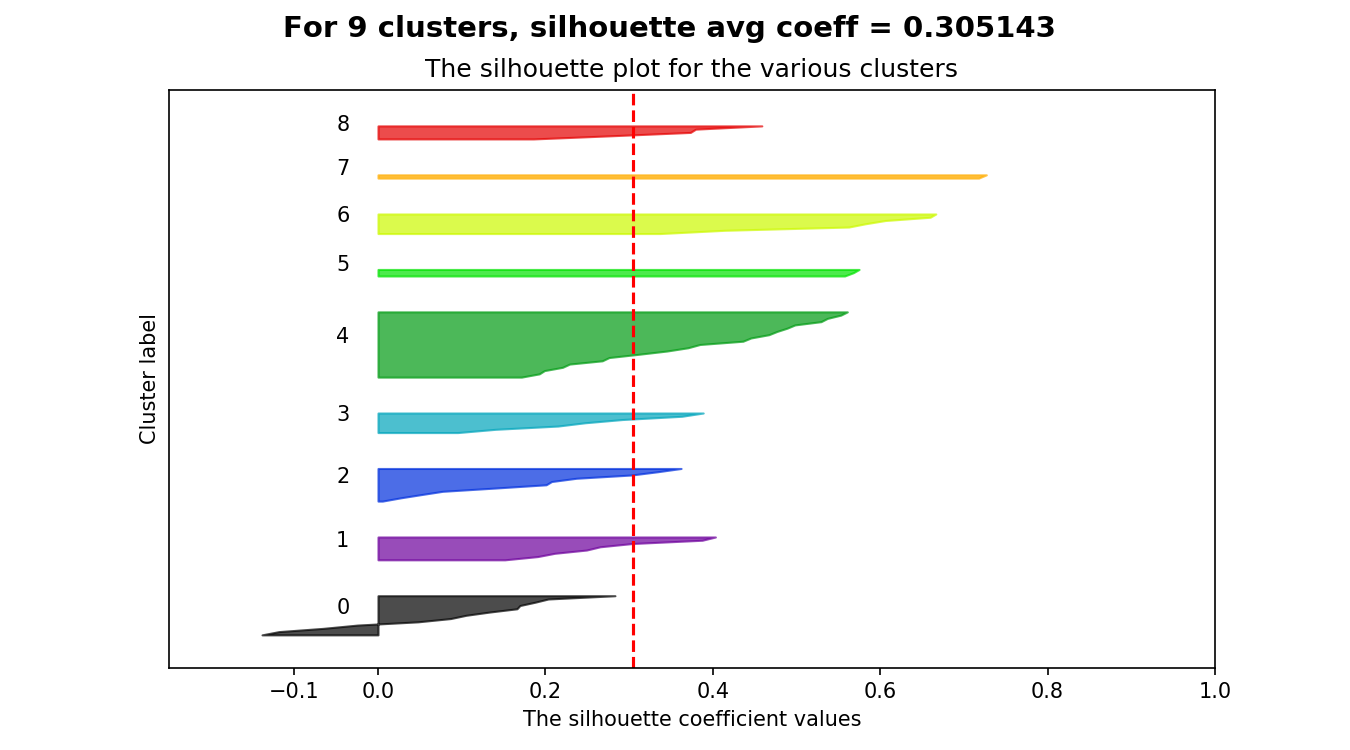

<IPython.core.display.Javascript object>


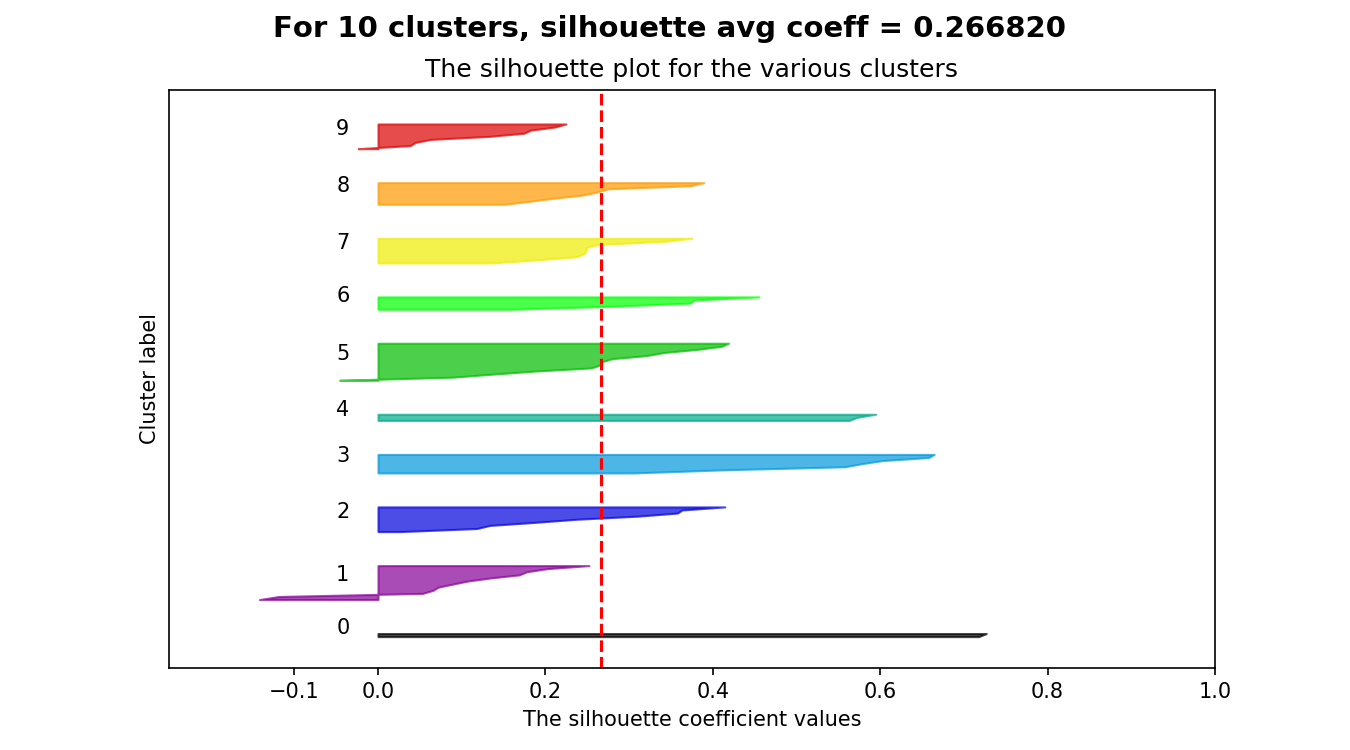

<IPython.core.display.Javascript object>


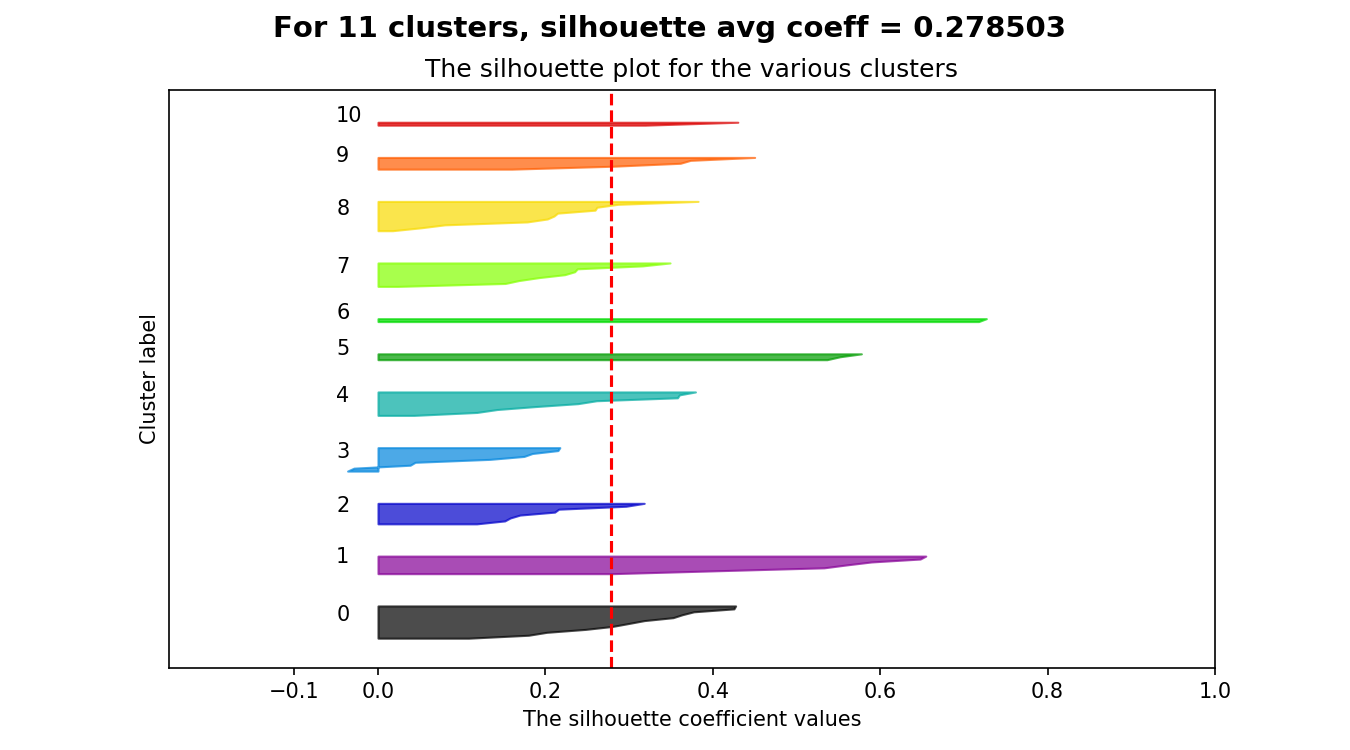

In [86]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from __future__ import print_function

# from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plt.figure()

print(__doc__)

### Just change this to your dataframe
X_matrix = scaled_data.as_matrix()

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, +1 
    
    ax1.set_xlim([-0.25, .5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ax1.set_ylim([0, len(X_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

### Note - Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8-9

In [ ]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

In [ ]:
kmeans_results = pd.DataFrame({"label":label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

### Add Cluster Labels to Original Data

In [ ]:
cereals = pd.read_csv("Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)


In [ ]:
final_cluster_data.shape

### Post-Process Clusters 

In [ ]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
analysis

In [ ]:
final_cluster_data.kmeans_cluster.value_counts()

#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html